<a href="https://colab.research.google.com/github/nikopj/SummerML/blob/master/Day4/Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Breast Cancer Diagnosis via Logistic Regression
In this demo, we will see how to visualize training data for classification, plot the logistic function and perform logistic regression. As an example, we will use the widely-used breast cancer data set. This data set is described here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin

Each sample is a collection of features that were manually recorded by a physician upon inspecting a sample of cells from fine needle aspiration. The goal is to detect if the cells are benign or malignant.

Loading and Visualizing the Data
We first load the packages as usual.

## Loading and Visualizing the Data

We first load the packages as usual

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, preprocessing
%matplotlib inline

Next, we load the data.  It is important to remove the missing values.

In [0]:
names = ['id','thick','size_unif','shape_unif','marg','cell_size','bare',
         'chrom','normal','mit','class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' +
                 'breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                names=names,na_values='?',header=None)
df = df.dropna()
df.head(6)

,id,thick,size_unif,shape_unif,marg,cell_size,bare,chrom,normal,mit,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4


After loading the data, we can create a scatter plot of the data labeling the class values with different colors.  We will pick two of the features.  

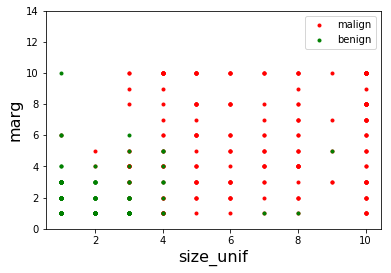

In [0]:
# Get the response.  Convert to a zero-one indicator 
yraw = np.array(df['class'])
BEN_VAL = 2   # value in the 'class' label for benign samples
MAL_VAL = 4   # value in the 'class' label for malignant samples
y = (yraw == MAL_VAL).astype(int)
Iben = (y==0)
Imal = (y==1)

# Get two predictors
xnames =['size_unif','marg'] 
X = np.array(df[xnames])

# Create the scatter plot
plt.plot(X[Imal,0],X[Imal,1],'r.')
plt.plot(X[Iben,0],X[Iben,1],'g.')
plt.xlabel(xnames[0], fontsize=16)
plt.ylabel(xnames[1], fontsize=16)
plt.ylim(0,14)
plt.legend(['malign','benign'],loc='upper right')

The above plot is not informative, since many of the points are on top of one another.  Thus, we cannot see the relative frequency of points.  

One way to improve the plot is to draw circles on each point whose size is proportional to the count of samples at that point.  We will re-use this code, so we define a function. 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

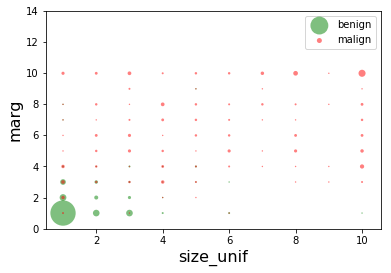

In [0]:
def plot_cnt(X,y):
    
    # Compute the bin edges for the 2d histogram
    x0val = np.array(list(set(X[:,0]))).astype(float)
    x1val = np.array(list(set(X[:,1]))).astype(float)
    x0, x1 = np.meshgrid(x0val,x1val)
    x0e= np.hstack((x0val,np.max(x0val)+1))
    x1e= np.hstack((x1val,np.max(x1val)+1))

    # Make a plot for each class
    yval = list(set(y))
    color = ['g','r']
    for i in range(len(yval)):
        I = np.where(y==yval[i])[0]
        cnt, x0e, x1e = np.histogram2d(X[I,0],X[I,1],[x0e,x1e])
        x0, x1 = np.meshgrid(x0val,x1val)
        plt.scatter(x0.ravel(), x1.ravel(), s=2*cnt.ravel(),alpha=0.5,
                    c=color[i],edgecolors='none')
    plt.ylim([0,14])
    plt.legend(['benign','malign'], loc='upper right')
    plt.xlabel(xnames[0], fontsize=16)
    plt.ylabel(xnames[1], fontsize=16)
    return plt

plot_cnt(X,y)

## In-Class Exercise

Based on the above plot, what would be a good "classifer" using the two features.  That is, write a function that makes a prediction `yhat` of the class label `y`.  Code up your classifier function.  Measure the accuracy of the classifier on the data.  What percentage error does your classifier get?

In [0]:
#TO DO

## Some Simple Classification ideas

Here are some ideas for classification that you may have already thought of.  We can see that the benign samples are located in the lower left.  So, one simple classification rule is to define the region with a line.  We plot the region for one possible line with the following code.

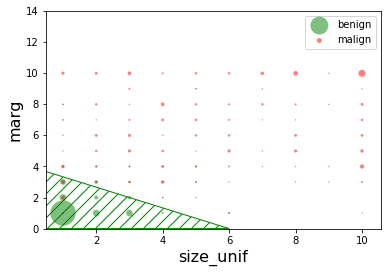

In [0]:
from matplotlib import patches
plt = plot_cnt(X,y)

ax = plt.gca() 
ax.add_patch(
    patches.Polygon([[0,0],[0,4],[6,0]],
        color='green',
        fill=False, hatch = '//'
    )
)

Here is an alternate classification rule based on two linear constraints.

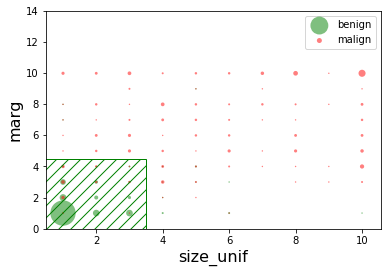

In [0]:
plt = plot_cnt(X,y)
ax = plt.gca()
ax.add_patch(
    patches.Rectangle(
        (0, 0),   # (x,y)
        width=3.5, height=4.5,  color='green',
        fill=False, hatch = '//'
    )
)

## Let us try to find the best linear classifier by using linear regression!

In [0]:
xnames =['size_unif','marg'] 
X = np.array(df[xnames])
y1=y-0.5 
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(X,y1)
print('regr.intercept=',regr.intercept_)
print('regr.coef=',regr.coef_)

regr.intercept= -0.5842006662006151
regr.coef= [0.10007944 0.04197521]


We can visualize this linear regression function as a separating line by setting y1=0, and find the relation between the two features by setting
w0+w1 * x1 + w2 * x2 = 0 ==> x2 = (-w0 - w1 * x1)/w2
We can plot this line together with the previous scatter plot

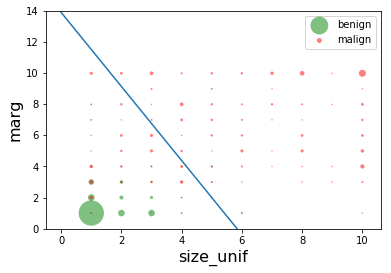

In [0]:
w0=regr.intercept_
w1=regr.coef_[0]
w2=regr.coef_[1]
plt = plot_cnt(X,y)
x1=np.zeros([11,1])
x2=np.zeros([11,1])
for i in range(11):
    x1[i]=i;
    x2[i]=(- w0-w1*i)/w2
    
plt.plot(x1, x2)

In [0]:
yhat=regr.predict(X)
yhati= (yhat >=0).astype(int)
acc = np.mean(yhati == y)
print("Accuracy on training data using two features = %f" % acc)

Accuracy on training data using two features = 0.922401


In [0]:
xnames = ['thick','size_unif','shape_unif','marg','cell_size','bare',
         'chrom','normal','mit']
X = np.array(df[xnames])

Xs = preprocessing.scale(X)
regr.fit(Xs,y1)
yhat=regr.predict(Xs)
yhati= (yhat >=0).astype(int)
acc = np.mean(yhati == y)
print("Accuracy on training data using 10 features = %f" % acc)

Accuracy on training data using 10 features = 0.960469


In [0]:
data = {'feature': xnames, 'slope': np.squeeze(regr.coef_)}
dfslope = pd.DataFrame(data=data)
dfslope

,feature,slope
0,thick,0.089390
1,size_unif,0.066909
2,shape_unif,0.046706
3,marg,0.023596
4,cell_size,0.022381
5,bare,0.165260
6,chrom,0.046940
7,normal,0.056522
8,mit,0.001695


## Logistic Functions

This demo illustrate an important classifier known as *logistic regression*.  In logistic regression, we do not just output an estimate of the class label, `yhat`.  Instead, we ouput a *probability*, an estimate of how likely the sample is one class or the other.  That is our output is a number from 0 to 1 representing the likelihood:
$$
    P(y = 1|x)
$$
which is our estimate of the probability that the sample is one class (in this case, a malignant sample) based on the features `x`.  This is sometimes called a *soft classifier*.  

In logistic regression, we assume that likelihood is of the form
$$
    P(y=1|x) = f(z),  \quad z = w_0 + w_1x_1 + \cdots + w_kx_k,  
$$
where $w_0,\ldots,w_k$ are the classifier weights and $f(z)$ is the so-called *logistic* function:
$$
    f(z) = \frac{1}{1+e^{-z}}.
$$

To understand the logistic function, suppose $x$ is a scalar and samples $y$ are drawn with $P(y=1|x) = f(w_1x)$ for some scaling constant $w_1$.  We plot these samples for different $w_1$.

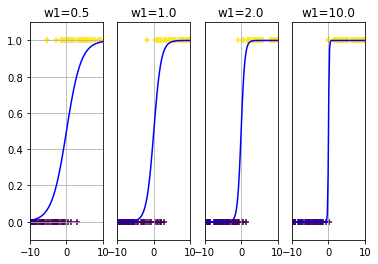

In [0]:
nx = 100
xm = 10
w1s = np.array([0.5,1,2,10])
nplot = w1s.size
iplot = 0
for w1 in w1s:
    iplot += 1
    x  = np.random.uniform(-xm,xm,nx)
    plt.subplot(1,nplot,iplot)
    py = 1/(1+np.exp(-w1*x))
    yp = np.array(np.random.rand(nx) < py)
    xp = np.linspace(-xm,xm,100)
    pyp = 1/(1+np.exp(-w1*xp))

    plt.scatter(x,yp,c=yp,edgecolors='none',marker='+')
    plt.plot(xp,pyp,'b-')
    plt.axis([-xm,xm,-0.1,1.1])
    plt.grid()
    if (iplot > 1):
        plt.yticks([])
    plt.xticks([-10,0,10])
    plt.title('w1={0:.1f}'.format(w1))


We see that $f(w_1x)$ represents the probability that $y=1$.  The function $f(w_1x) > 0.5$ for $x>0$ meaning the samples are more likely to be $y=1$.  Similarly, for $x<0$, the samples are more likely to $y=0$.  The scaling $w_1$ determines how fast that transition is.

## Fitting the Logistic Model

In a logistic model, we must fit the weights $w_0,w_1,\ldots,w_k$ in the model 
$$
    P(y=1|x) = f(z),  \quad z = w_0 + w_1x_1 + \cdots + w_kx_k,  
$$
The `sklearn` module has very good routines for fitting this model.  First we get the training data and samples.  We will standardize the `X` values to make more sense of the slope values.

In [0]:
xnames = ['thick','size_unif','shape_unif','marg','cell_size','bare',
         'chrom','normal','mit']
X = np.array(df[xnames])
Xs = preprocessing.scale(X)

Next, we create a logistic regression object.  The parameter `C` states the level of regularization and will be discussed in class.

In [0]:
logreg = linear_model.LogisticRegression(C=1e5)

Then, we fit the model

In [0]:
logreg.fit(Xs, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

We can next plot the accuracy on the training data.  We see we get an accuracy better than simple linear classifier. 

In [0]:
yhat = logreg.predict(Xs)
acc = np.mean(yhat == y)
print("Accuracy on training data = %f" % acc)

Accuracy on training data = 0.969253


It is also useful to print the weights for each feature.  We can use the `pandas` package to make a table. 

In [0]:
W=logreg.coef_
data = {'feature': xnames, 'slope': np.squeeze(W)}
dfslope = pd.DataFrame(data=data)
dfslope

,feature,slope
0,thick,1.508834
1,size_unif,-0.015979
2,shape_unif,0.957072
3,marg,0.947234
4,cell_size,0.214964
5,bare,1.395001
6,chrom,1.095654
7,normal,0.650696
8,mit,0.925912


## Cross-Validation

The above code measured the accuracy on the training data.  However, we should measure the accuracy on test data.  We perform 4-fold cross-validation and print average precision, recall, f1-score and accuracy.


In [0]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
nfold = 10
kf = KFold(n_splits=nfold)
prec = []
rec = []
f1 = []
acc = []
for train, test in kf.split(Xs):            
    # Get training and test data
    Xtr = Xs[train,:]
    ytr = y[train]
    Xts = Xs[test,:]
    yts = y[test]
    
    # Fit a model
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)
    
    # Measure performance
    preci,reci,f1i,_= precision_recall_fscore_support(yts,yhat,average='binary') 
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)
    acci = np.mean(yhat == yts)
    acc.append(acci)

# Take average values of the metrics
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
accm= np.mean(acc)

# Compute the standard errors
prec_se = np.std(prec)/np.sqrt(nfold-1)
rec_se = np.std(rec)/np.sqrt(nfold-1)
f1_se = np.std(f1)/np.sqrt(nfold-1)
acc_se = np.std(acc)/np.sqrt(nfold-1)

print('Precision = {0:.4f}, SE={1:.4f}'.format(precm,prec_se))
print('Recall =    {0:.4f}, SE={1:.4f}'.format(recm, rec_se))
print('f1 =        {0:.4f}, SE={1:.4f}'.format(f1m, f1_se))
print('Accuracy =  {0:.4f}, SE={1:.4f}'.format(accm, acc_se))

Precision = 0.9610, SE=0.0118
Recall =    0.9615, SE=0.0144
f1 =        0.9608, SE=0.0112
Accuracy =  0.9679, SE=0.0110


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur


For classification models, performance measurement is an essential task. We use AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve for this purpose.

## Errors in Binary Classification

There are two types of errors here:
* Type I error (False Positive or false alarm):  Decide $\hat{y}=1$ when ${y}=0$ 
* Type II error (False Negative or missed detection):  Decide $\hat{y}=1$ when ${y}=1$

Decision Types:
* **False Positive (FP)** decision implies that the patient is inaccurately diagnosed with breast cancer (in this case).
* **False Negative (FN)** decision implies that the patient has breast canser (in this case) but is identified as they don't. 
* **True Positive (TP)** decision implies that the patient is accurately diagnosed with breast cancer (in this case).
* **True Negative (TN)** decision implies that the patient is accurately identified as not having breast cancer (in this case).


To keep the errors in check we measure the accuracy of the classifier:

* TPR (True Positive Rate) also referred to as Sensitivity, or Recall = TP/(TP + FN)

* TNR (True Negative Rate) also called Specificity = TN/(TN + FP)

* FPR (False Positive Rate) or 1 - Specificity = FP/(TN+FP)

*Sensitivity* measures the proportion of actual positives that are correctly identified as such (that is, the percentage of patients accurately diagnosed with breast cancer).

*Specificity* measures the proportion of actual negatives that are correctly identified as such (that is, the percentage of healthy patients who are accurately identified as not having breast cancer).

*Accuracy* measures the percentage of correct classification

* **TPR** / Sensitivity =  $P(\hat{y}=1|y=1)$ 
* **FPR** / 1- Specificity = $P(\hat{y}=1|y=0)$
* **Accuracy** = $P(\hat{y}=1|y=1)$ + $P(\hat{y}=0|y=0)$

(Where y is true decision, yhat is the predicted output)

**[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)**, also known as an error matrix, is useful to visualize the errors.

| Real/Predicted| Class Positive - Predicted | Class Negative  - Predicted| 
|---|---|---|
| **Class Positive - Real**  |  TP |  FN |  
|  **Class Negative - Real** |  FP |  TN |  

 
## ROC curve and AUC:

ROC is a probability curve and AUC represents the degree or measure of separability. It tells us how much our model is capable of distinguishing between classes. 

*Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.* So, higher the AUC, better the model is at distinguishing between patients with breast cancer and no breast cancer.


As shown above, the logistic classifier outputs a *soft* classification $P(y=1|x)$.  One simple idea is to select the class label $\hat{y}=1$ whenever $P(y=1|x) > 0.5$.  

However, one can also set $\hat{y}=1$ whenever $P(y=1|x) > t$ for some threshold $t$. 


Using higher thresholds values selects $\hat{y}=0$ more often which results in fewer *false alarms*, but also many *missed detections* (reduces sensitivity).  Similarly, lower thresholds values selects $\hat{y}=1$ more often which results in fewer *missed detections* (increases *sensitivity*) but also more *false alarms*.  The ROC curve displays this  tradeoff by graphing the *true positive rate* vs. *false positive rate* obtained with different $t$.  

The ROC curve can be plotted in the `sklearn` package with the following code.

(0, 0.1)

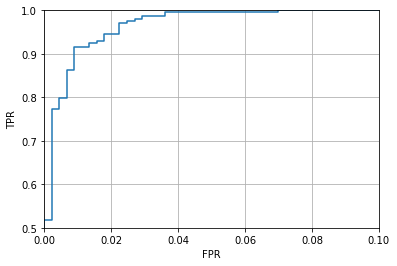

In [0]:
from sklearn import metrics
yprob = logreg.predict_proba(Xs)
fpr, tpr, thresholds = metrics.roc_curve(y,yprob[:,1])

plt.plot(fpr,tpr)
plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.5,1])
plt.xlim([0,0.1])

(0, 1.0)

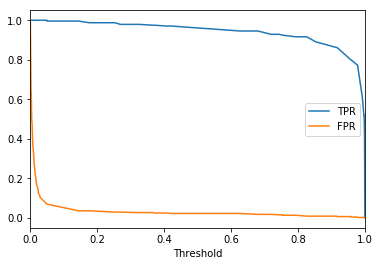

In [0]:
plt.plot(thresholds,tpr, thresholds,fpr)
plt.legend(['TPR','FPR'])
plt.xlabel('Threshold')
plt.xlim([0,1.0])

In [0]:
auc=metrics.roc_auc_score(y,yprob[:,1])
print("AUC=%f" % auc)

AUC=0.996297
